<a href="https://colab.research.google.com/github/nathfcastro/Project-One---Part-One-/blob/main/Project_One_Part_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
filename = '/content/sales_predictions.csv'
sale_df = pd.read_csv(filename)

# Project One - Part Two 
Student Name: Nathalie Castro

# Loading Data

In [3]:
sale_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning 

### 1) How many rows and columns?

In [5]:
sale_df.shape

(8523, 12)

In [6]:
# There are 8, 523 Rows and 12 columns

### 2) What are the datatypes of each variable?

In [7]:
sale_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3) Are there duplicates? If so, drop any duplicates.

In [8]:
sale_df.duplicated().sum()

0

### 4) Identify missing values.

In [9]:
sale_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [10]:
sale_df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
sale_df['Item_Weight'].mean()

12.857645184135976

In [12]:
sale_df['Item_Weight'] = sale_df['Item_Weight'].fillna(value = '12.86')

In [13]:
sale_df['Item_Weight'].value_counts()

12.86    1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
7.275       2
7.685       1
9.42        1
6.52        1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64

In [14]:
sale_df['Outlet_Size'] = sale_df['Outlet_Size'].fillna(value ='Unknown')

In [15]:
sale_df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [16]:
sale_df['Outlet_Size'] = sale_df['Outlet_Size'].fillna(value = 'Unknown')

In [17]:
sale_df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

I wanted to fill the missing data rather than dropping the row nor the column. This is easier because we can identify which values are unknown and which we have data on. 

### 6) Confirm that there are no missing values after addressing them.

In [18]:
sale_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [19]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [20]:
sale_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
sale_df['Item_Fat_Content'] = sale_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
sale_df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    2889
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [22]:
sale_df['Item_Fat_Content'] = sale_df['Item_Fat_Content'].replace('reg', 'Regular')
sale_df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    3006
LF          316
Name: Item_Fat_Content, dtype: int64

### 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [23]:
sale_df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Visuals

### Histogram to view the distributions of various features in your dataset.

In [24]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

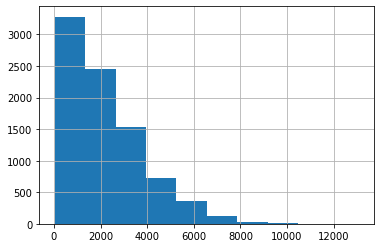

In [26]:
sale_df['Item_Outlet_Sales'].hist()
plt.ticklabel_format(useOffset=False, style='plain');

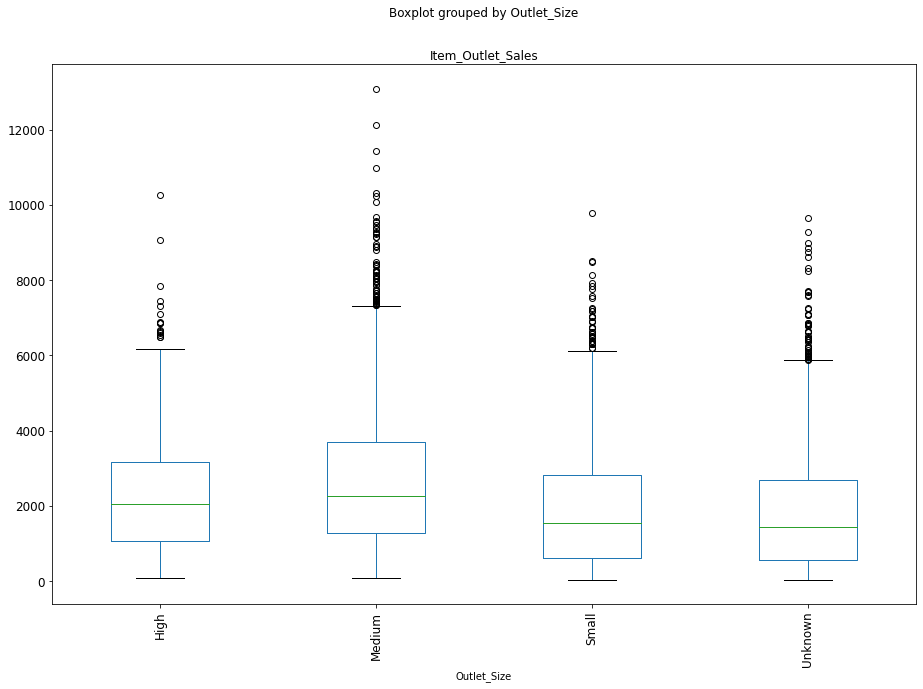

In [27]:
sale_df.boxplot(['Item_Outlet_Sales'],
           by ='Outlet_Size',
           figsize=(15,10),
           fontsize=12,
           rot=90,
           grid=False);

In [96]:
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')
corr = sale_df.corr

In [94]:
import seaborn as sns 

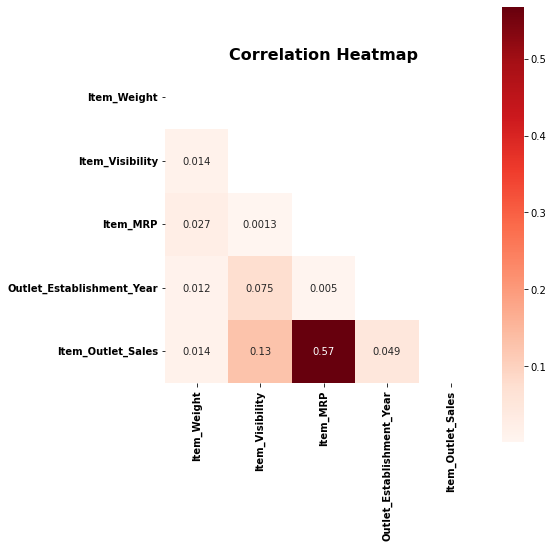

In [99]:
plt.figure(figsize = (8,8),facecolor='w')
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold', rotation=0);
plt.tight_layout()
plt.show;

# Explanatory Visual 

* Build on your previous cleaning, exploration, and analysis.
* Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
* Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

### Possible Questions to Answer: 


1.   Which item types cost the most and least amount of money?
2.   Which item types were shown more in stores and which were shown the least?


In [40]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [47]:
means = sale_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

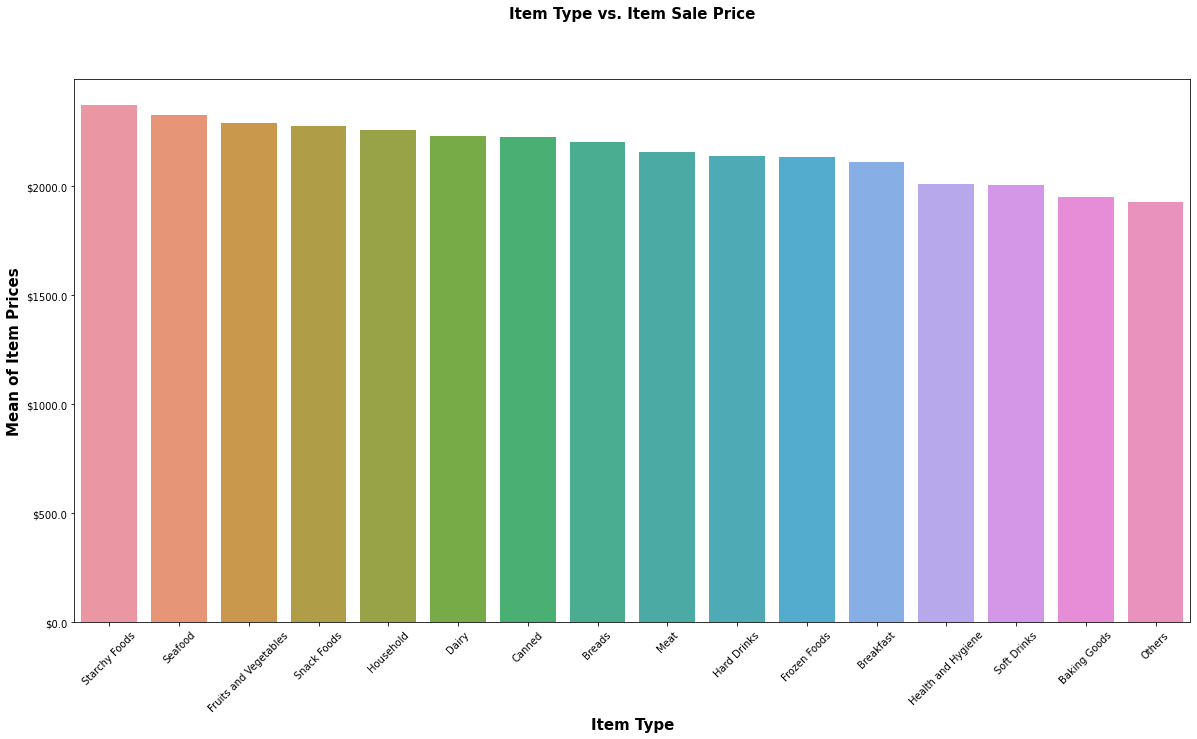

In [87]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Item Type vs. Item Sale Price', 
             fontsize = 15, 
             fontweight = 'bold',
             y=1.1);
ax.set_xlabel('Item Type', 
              fontsize = 15, 
              fontweight = 'bold')
ax.set_ylabel('Mean of Item Prices', 
              fontsize = 15, 
              fontweight = 'bold');

def one_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in thousands"""
  return f'${x}'

price_fmt_1k = FuncFormatter(one_k)

ax.yaxis.set_major_formatter(price_fmt_1k)

### Which item types cost the most and least amount of money?

The top five highest outlet priced items are as follows: 

*   Starchy Foods
*   Seafood 
* Fruits and Vegetables
* Snack Foods
* Household Items

The bottom five lowest outlet priced iems are as followed: 

* Breakfast 
* Health and Hygiene 
* Soft Drinks 
* Baking Goods 
* Others



In [55]:
means2 = sale_df.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False)
means2

Item_Type
Breakfast                0.085723
Seafood                  0.074976
Dairy                    0.072427
Baking Goods             0.069169
Fruits and Vegetables    0.068513
Canned                   0.068129
Starchy Foods            0.067564
Snack Foods              0.066850
Breads                   0.066255
Frozen Foods             0.065645
Hard Drinks              0.064943
Soft Drinks              0.063972
Meat                     0.062284
Household                0.061322
Others                   0.060241
Health and Hygiene       0.055216
Name: Item_Visibility, dtype: float64

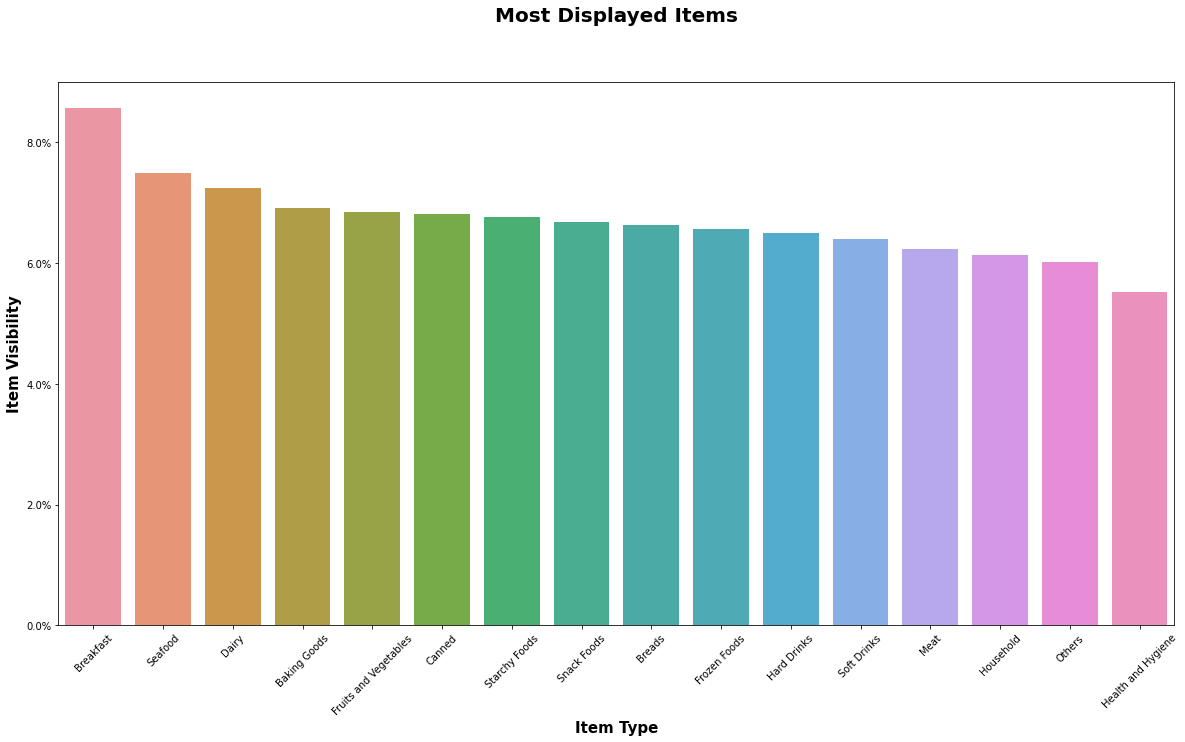

In [92]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', 
                 y = 'Item_Visibility', 
                 order = means2.index, 
                 ci = None)
plt.xticks(rotation = 45)
ax.set_title('Most Displayed Items', 
             fontsize = 20, 
             fontweight = 'bold',
             y=1.1);
ax.set_xlabel('Item Type', 
              fontsize = 15, 
              fontweight = 'bold')
ax.set_ylabel('Item Visibility', 
              fontsize = 15, 
              fontweight = 'bold');

def one_percent(x,pos):
  """function for use with matplotlib FuncFormatter - format item visibility in percentage"""
  return f'{x*100}%'


price_fmt_percent = FuncFormatter(one_percent)

ax.yaxis.set_major_formatter(price_fmt_percent)

### Which item type was shown the most in stores and which item type was shown the least?

The top item that was shown the most in stores was:

* Breakfast items 

The least item that was shown the most in stores was:

* Health and Hygiene